# Assignment 1

Due end of day Thursday Sept 18th.

## Question 1:
{method, implementation, answer}

Examine the value of sparse matricies by comparing the approximate computational efficiencies of sparse and dense solvers (on the same system). Use the %timeit function to approximate the complexity.

HINT: Refer to the lecture notes on how to generate, store, and apply sparse solvers.  

In [2]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

# Matrix size
n = 2000

# Generate a random sparse matrix (5 diagonals populated)
A_sparse = sp.diags([np.ones(n), np.ones(n-1), np.ones(n-1)], [0, -1, 1], format="csr")
b = np.ones(n)

# Dense version of the matrix
A_dense = A_sparse.toarray()

# Sparse solver
%timeit spla.spsolve(A_sparse, b)

# Dense solver
%timeit np.linalg.solve(A_dense, b)


<magic-timeit>:1: MatrixRankWarning: Matrix is exactly singular


838 µs ± 214 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


LinAlgError: Singular matrix

## Question 2

Consider the truss:

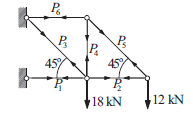


### 2a) Write the linear system for the tensions $P_i$ as equations and in matrix form
{answer}

### 2b) Solve for $P_i$ using LU decomposition and substitution.
{method, answer}

### 2c)  Double the loads (18 kN and 12 kN) and solve for $P_i$ again *without refactoring*.
{answer}

## Question 3

Consider the matrix:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

## 3a) Calculate the condition number of A
{answer}

## 3b) Let's use a preconditioner matrix $P$ to improve the condition number of the product $P^{-1} A$. Give 2 examples of $P$ that improve the condition number.

Can you identify the 'perfect' preconditioner? (Consider the easiest matrix to solve!)
{answer, answer}